In [1]:
import pandas as pd
import json
import  tarfile
import bz2
import os
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk import agreement
import statsmodels.formula.api as smf
sns.set_style('whitegrid')
%matplotlib inline
import random
import matplotlib.patches as mpatches
import math

import multiprocessing
import json
import os
import re
import datetime
import time
import pprint
from datetime import datetime
from datetime import timedelta
import pytz
import glob
from random import sample
import pickle
from datetime import date, timedelta
from scipy import stats

In [2]:
pos = [
    'Article:',
    'AuxVb:',
    'Verbs:',
    'Pronoun:',
    'Adverbs:',
    'Prep:',
    'Conj:',
    'Negate:',
    'Quant:',
    'Numbers:',
    'Swear:',
    'Assent:',
    'Nonflu:',
    'Filler:'
]

In [3]:
df_aggregated = pd.read_pickle('topics_and_pos_df_aggregated.pickle')

In [4]:
df_aggregated

,topic,number_of_tweets,histogram_characters_2017,histogram_characters_2019
0,achievement,4053117,4 16.0 5 144.0 6 62.0 7 ...,4 125.0 5 336.0 6 183.0 7 ...
1,affection,5325703,4 115.0 5 39.0 6 154.0 7 ...,4 207.0 5 122.0 6 436.0 7 ...
2,aggression,1888089,4 42.0 5 55.0 6 48.0 7 ...,4 59.0 5 32.0 6 32.0 7 ...
3,air_travel,1182093,4 6.0 5 12.0 6 17.0 7 29....,4 10.0 5 11.0 6 32.0 7 ...
4,alcohol,1341116,4 28.0 5 59.0 6 17.0 7 ...,4 43.0 5 356.0 6 35.0 7 ...
...,...,...,...,...
254,Verbs:,104680991,4 7687.0 5 4608.0 6 7709.0 7...,4 14230.0 5 8408.0 6 17147.0 7...
255,We:,9953317,4 9.0 5 79.0 6 193.0 7 ...,4 29.0 5 253.0 6 609.0 7 ...
256,Work:,20256419,4 6695.0 5 1284.0 6 1233.0 7 ...,4 4834.0 5 3519.0 6 1708.0 7 ...
257,You:,30305491,4 162.0 5 332.0 6 345.0 7 ...,4 310.0 5 664.0 6 645.0 7 ...


In [5]:
row = df_aggregated.loc[df_aggregated['topic'] == 'TOTAL NUMBER'].iloc[0]

n1_total = np.array([row['histogram_characters_2017'][i] if i in row['histogram_characters_2017'].index else 0 for i in range(1,141)])
n2_total = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 for i in range(1,281)])
 

In [6]:
sum(n2_total)

75488434.0

In [7]:

sum(n1_total)

65291015.0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


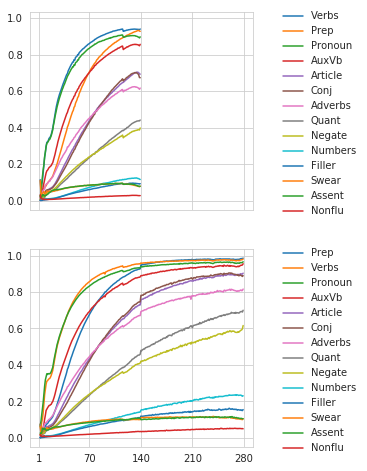

In [8]:
fig, ax = plt.subplots(2,1,figsize= (4,8), sharey = True, sharex = True)


pos_tags = []
occurence = []

for topic,row in df_aggregated.iterrows():
    if row['topic'] in pos:
        n1 = np.array([row['histogram_characters_2017'][i] if i in row['histogram_characters_2017'].index else 0 \
                       for i in range(1,141)])
        occurence.append(n1 / (n1_total))
        pos_tags.append(row['topic'])


occ_sorted, pos_tags_sorted, occurence_sorted = zip(*sorted(zip([o[-1] for o in occurence], pos_tags, occurence)))

sbplt = ax[0]                       
                         
for i in range(len(occurence))[::-1]:
    sbplt.plot(occurence_sorted[i],label = pos_tags_sorted[i][:-1])

sbplt.legend(bbox_to_anchor = (1.5,1.05),frameon=False)

                         
pos_tags = []
occurence = []

for topic,row in df_aggregated.iterrows():
    if row['topic'] in pos:
        n1 = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 \
                       for i in range(1,281)])
        occurence.append(n1 / n2_total)
        pos_tags.append(row['topic'])
        
occ_sorted, pos_tags_sorted, occurence_sorted = zip(*sorted(zip([o[-1] for o in occurence], pos_tags, occurence)))

sbplt = ax[1]  
                         
for i in range(len(occurence))[::-1]:
    plt.plot(occurence_sorted[i],label = pos_tags_sorted[i][:-1])
    
sbplt.legend(bbox_to_anchor = (1.5,1.05),frameon=False)

sbplt.set_xticks(np.concatenate(([1],range(0,281)[::70][1:])))


In [9]:
colors = plt.cm.tab20b(np.linspace(0,1,14))

In [10]:
from matplotlib.ticker import FormatStrFormatter

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


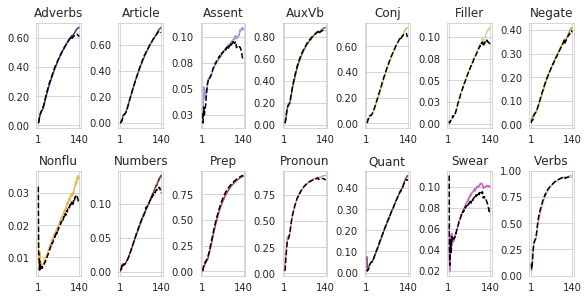

In [11]:
fig, ax = plt.subplots(2,7,figsize= (8,4), sharex = False, sharey = False)





pos_tags = []
occurence = []

for topic,row in df_aggregated.iterrows():
    if row['topic'] in pos:
        n1 = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 \
                       for i in range(1,141)])
        occurence.append(n1 / n2_total[:140])
        pos_tags.append(row['topic'])
        

                         
for i in range(len(occurence))[::-1]:
    sbplt = ax[math.floor(i/7),i%7]
    sbplt.plot(occurence[i], color = colors[i])
    sbplt.set_title(pos_tags[i][:-1])
    sbplt.set_xticks(np.concatenate(([1],range(0,141)[::140][1:])))
#"sbplt.legend(bbox_to_anchor = (1.5,1),frameon=False)



pos_tags = []
occurence = []

i = 0
for topic,row in df_aggregated.iterrows():
    if row['topic'] in pos:
        n1 = np.array([row['histogram_characters_2017'][i] if i in row['histogram_characters_2017'].index else 0 \
                       for i in range(1,141)])
        occurence.append(n1 / (n1_total))
        pos_tags.append(row['topic'])

                     
                         
for i in range(len(occurence))[::-1]:
    sbplt = ax[math.floor(i/7),i%7]
    sbplt.plot(occurence[i],label = pos_tags[i][:-1], color = 'black',linestyle = '--')
    sbplt.set_xticks(np.concatenate(([1],range(0,141)[::140][1:])))
    sbplt.tick_params(axis='y', labelsize=10) 
    sbplt.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
sbplt = ax[1,5]



fig.tight_layout(pad=0.1, w_pad=0.1, h_pad=1.0)

plt.savefig("fig10.pdf", bbox_inches='tight')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


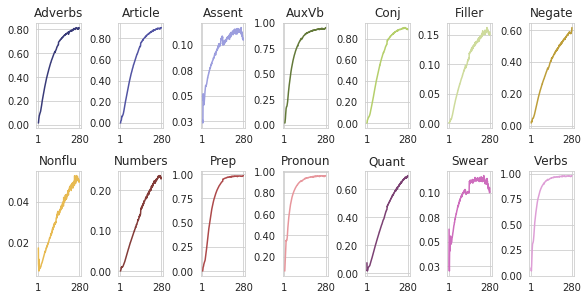

In [12]:
fig, ax = plt.subplots(2,7,figsize= (8,4), sharex = False, sharey = False)



pos_tags = []
occurence = []

     
pos_tags = []
occurence = []

for topic,row in df_aggregated.iterrows():
    if row['topic'] in pos:
        n1 = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 \
                       for i in range(1,281)])
        occurence.append(n1 / n2_total[:280])
        pos_tags.append(row['topic'])
        

                         
for i in range(len(occurence))[::-1]:
    sbplt = ax[math.floor(i/7),i%7]
    sbplt.plot(occurence[i],color = colors[i])
    sbplt.set_title(pos_tags[i][:-1])
    sbplt.set_xticks(np.concatenate(([1],range(0,281)[::280][1:])))
    sbplt.tick_params(axis='y', labelsize=10) 
    sbplt.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#"sbplt.legend(bbox_to_anchor = (1.5,1),frameon=False)





fig.tight_layout(pad=0.1, w_pad=0.1, h_pad=1.0)

plt.savefig("fig11.pdf", bbox_inches='tight')

In [13]:
#140 was more drastic than 280 -- the decrease near the boundary
#near 280 no such drastic decrease near the boundary
#concievably similar effects

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


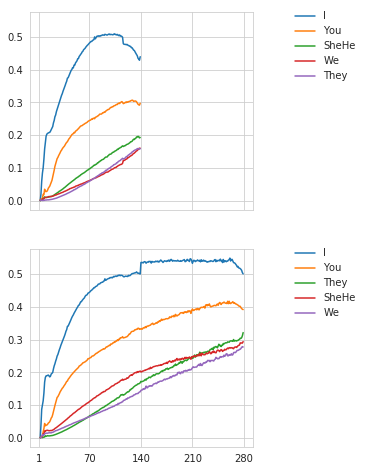

In [14]:
personal_pronouns_finegrained = [
    'I:',
    'You:',
    'SheHe:',
    'We:',
    'They:'
]


fig, ax = plt.subplots(2,1,figsize= (4,8), sharey = True, sharex = True)


pos_tags = []
occurence = []

for topic,row in df_aggregated.iterrows():
    if row['topic'] in personal_pronouns_finegrained:
        n1 = np.array([row['histogram_characters_2017'][i] if i in row['histogram_characters_2017'].index else 0 \
                       for i in range(1,141)])
        occurence.append(n1 / (n1_total))
        pos_tags.append(row['topic'])


occ_sorted, pos_tags_sorted, occurence_sorted = zip(*sorted(zip([o[-1] for o in occurence], pos_tags, occurence)))

sbplt = ax[0]                       
                         
for i in range(len(occurence))[::-1]:
    sbplt.plot(occurence_sorted[i],label = pos_tags_sorted[i][:-1])

sbplt.legend(bbox_to_anchor = (1.5,1.05),frameon=False)

                         
pos_tags = []
occurence = []

for topic,row in df_aggregated.iterrows():
    if row['topic'] in personal_pronouns_finegrained:
        n1 = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 \
                       for i in range(1,281)])
        occurence.append(n1 / n2_total)
        pos_tags.append(row['topic'])
        
occ_sorted, pos_tags_sorted, occurence_sorted = zip(*sorted(zip([o[-1] for o in occurence], pos_tags, occurence)))

sbplt = ax[1]  
                         
for i in range(len(occurence))[::-1]:
    plt.plot(occurence_sorted[i],label = pos_tags_sorted[i][:-1])
    
sbplt.legend(bbox_to_anchor = (1.5,1.05),frameon=False)

sbplt.set_xticks(np.concatenate(([1],range(0,281)[::70][1:])))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


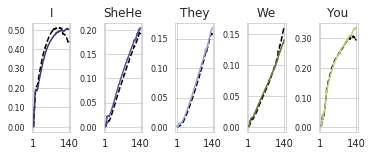

In [15]:
fig, ax = plt.subplots(1,5,figsize= (5,2), sharex = False, sharey = False)



pos_tags = []
occurence = []

i = 0
for topic,row in df_aggregated.iterrows():
    if row['topic'] in personal_pronouns_finegrained:
        n1 = np.array([row['histogram_characters_2017'][i] if i in row['histogram_characters_2017'].index else 0 \
                       for i in range(1,141)])
        occurence.append(n1 / (n1_total))
        pos_tags.append(row['topic'])

                     
                         
for i in range(len(occurence))[::-1]:
    sbplt = ax[i]
    sbplt.plot(occurence[i],label = pos_tags[i][:-1], color = 'black', linestyle = '--')

                         
pos_tags = []
occurence = []

for topic,row in df_aggregated.iterrows():
    if row['topic'] in personal_pronouns_finegrained:
        n1 = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 \
                       for i in range(1,141)])
        occurence.append(n1 / n2_total[:140])
        pos_tags.append(row['topic'])
        

                         
for i in range(len(occurence))[::-1]:
    sbplt = ax[i]
    sbplt.plot(occurence[i],color = colors[i])
    sbplt.set_title(pos_tags[i][:-1])
    sbplt.tick_params(axis='y', labelsize=8)
    sbplt.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#"sbplt.legend(bbox_to_anchor = (1.5,1),frameon=False)


    sbplt.set_xticks(np.concatenate(([1],range(0,141)[::140][1:])))



fig.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)

plt.savefig("fig12.pdf", bbox_inches='tight')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


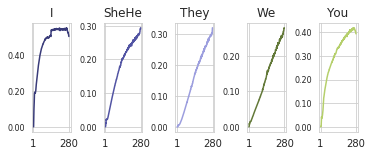

In [53]:
fig, ax = plt.subplots(1,5,figsize= (5,2), sharex = False, sharey = False)



pos_tags = []
occurence = []



                         
pos_tags = []
occurence = []

for topic,row in df_aggregated.iterrows():
    if row['topic'] in personal_pronouns_finegrained:
        n1 = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 \
                       for i in range(1,281)])
        occurence.append(n1 / n2_total[:280])
        pos_tags.append(row['topic'])
        

                         
for i in range(len(occurence))[::-1]:
    sbplt = ax[i]
    sbplt.plot(occurence[i],color = colors[i])
    sbplt.set_title(pos_tags[i][:-1])
    sbplt.tick_params(axis='y', labelsize=8)
    sbplt.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#"sbplt.legend(bbox_to_anchor = (1.5,1),frameon=False)


    sbplt.set_xticks(np.concatenate(([1],range(0,281)[::280][1:])))



fig.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.savefig("fig13.pdf", bbox_inches='tight')

In [ ]:
# focus on I: the occurence pattern after the switch close to 280 similar to occurance pattern
# close to 140 before the switch